In [1]:
#Loading Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import KElbowVisualizer

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

In [6]:
df=pd.read_excel('C:/Users/Sushree Jena/Desktop/imarticus/machine learning/extra/New folder/Online Retail.xlsx')

In [7]:
df.shape

(541909, 8)

In [8]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [9]:
#checking info

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
#Descriptive Statistics

In [12]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [13]:
#checking for duplicates

In [14]:
df.duplicated().sum()

5268

In [15]:
#Dropping the duplicated entries

In [16]:
df=df.drop_duplicates()

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(536641, 8)

In [19]:
#Checking for missing values

In [20]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135037
Country             0
dtype: int64

In [21]:
#Dropping the null values

In [22]:
df=df.dropna()

In [23]:
df.shape

(401604, 8)

In [24]:
df[['Quantity','UnitPrice']].min()

Quantity    -80995.0
UnitPrice        0.0
dtype: float64

There are some negative values in the Quantity column. Let's drop those values since it is not feasible in the real world.

In [25]:
neg_Quantity_index=df[df['Quantity']<0].index

In [26]:
df.drop(df[df['Quantity']<0].index,inplace=True)

In [27]:
df.shape

(392732, 8)

In [28]:
#Creating a backup

In [29]:
df1=df.copy(deep=True)

In [30]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [31]:
#Grouping the dataset by country

In [32]:
df1.groupby('Country')['StockCode'].count().sort_values(ascending=False).head(10)

Country
United Kingdom    349227
Germany             9027
France              8327
EIRE                7228
Spain               2480
Netherlands         2363
Belgium             2031
Switzerland         1842
Portugal            1453
Australia           1184
Name: StockCode, dtype: int64

## Customer Segmentation Based on RFM Analysis 

### RFM Analysis

In [33]:
#Calculating Recency

In [34]:
import datetime as dt

In [35]:
df1['Invoice_Date']=df1['InvoiceDate'].dt.date

In [36]:
df1['Invoice_Time']=df1['InvoiceDate'].dt.time

In [37]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [38]:
#Dropping off the InvoiceDate column

In [39]:
df1=df1.drop('InvoiceDate',axis=1)

In [40]:
#Creating a new dataframe for Recency

In [41]:
df_recency=df1.groupby('CustomerID',as_index=False)['Invoice_Date'].max()
df_recency.head()

,CustomerID,Invoice_Date
0,12346.0,2011-01-18
1,12347.0,2011-12-07
2,12348.0,2011-09-25
3,12349.0,2011-11-21
4,12350.0,2011-02-02


In [42]:
df_recency.columns=('CustomerID','LastPurchaseDate')

In [43]:
recent_date=df_recency['LastPurchaseDate'].max()
recent_date

datetime.date(2011, 12, 9)

In [44]:
df_recency['Recency']=df_recency['LastPurchaseDate'].apply(lambda x:(recent_date-x).days)

In [45]:
df_recency.head()

,CustomerID,LastPurchaseDate,Recency
0,12346.0,2011-01-18,325
1,12347.0,2011-12-07,2
2,12348.0,2011-09-25,75
3,12349.0,2011-11-21,18
4,12350.0,2011-02-02,310


In [46]:
#Calculating Frequency

In [47]:
#Creating a new dataframe for Frequency

In [48]:
df_frequency=df1.groupby('CustomerID',as_index=False)['Invoice_Date'].count()

In [49]:
df_frequency.columns=['CustomerID','Frequency']
df_frequency.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [50]:
#Calculating Monetary Value

In [51]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00


In [52]:
df1['Total']=df1['Quantity']*df1['UnitPrice']

In [53]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34


In [54]:
#Creating a new dataframe for Monetary Value

In [55]:
df_monetary=df1.groupby('CustomerID',as_index=False)['Total'].sum()

In [56]:
df_monetary.columns=['CustomerID','Monetary']
df_monetary.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [57]:
df_monetary.shape,df_frequency.shape,df_recency.shape

((4339, 2), (4339, 2), (4339, 3))

In [58]:
#Merging the three dataframes into 1 dataframe

In [59]:
rf_df=df_recency.merge(df_frequency,on='CustomerID')
rf_df.head()

,CustomerID,LastPurchaseDate,Recency,Frequency
0,12346.0,2011-01-18,325,1
1,12347.0,2011-12-07,2,182
2,12348.0,2011-09-25,75,31
3,12349.0,2011-11-21,18,73
4,12350.0,2011-02-02,310,17


In [60]:
rfm_df=rf_df.merge(df_monetary,on='CustomerID')
rfm_df.head()

,CustomerID,LastPurchaseDate,Recency,Frequency,Monetary
0,12346.0,2011-01-18,325,1,77183.60
1,12347.0,2011-12-07,2,182,4310.00
2,12348.0,2011-09-25,75,31,1797.24
3,12349.0,2011-11-21,18,73,1757.55
4,12350.0,2011-02-02,310,17,334.40


In [61]:
rfm_df=rfm_df.drop('LastPurchaseDate',axis=1)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,2,182,4310.00
2,12348.0,75,31,1797.24
3,12349.0,18,73,1757.55
4,12350.0,310,17,334.40


In [62]:
rfm_df['r']=pd.qcut(rfm_df['Recency'],q=4,labels=range(4,0,-1))
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,r
0,12346.0,325,1,77183.60,1
1,12347.0,2,182,4310.00,4
2,12348.0,75,31,1797.24,2
3,12349.0,18,73,1757.55,3
4,12350.0,310,17,334.40,1


In [63]:
rfm_df['f']=pd.qcut(rfm_df['Frequency'],q=4,labels=range(1,5))
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,r,f
0,12346.0,325,1,77183.60,1,1
1,12347.0,2,182,4310.00,4,4
2,12348.0,75,31,1797.24,2,2
3,12349.0,18,73,1757.55,3,3
4,12350.0,310,17,334.40,1,1


In [64]:
rfm_df['m']=pd.qcut(rfm_df['Monetary'],q=4,labels=range(1,5))
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,r,f,m
0,12346.0,325,1,77183.60,1,1,4
1,12347.0,2,182,4310.00,4,4,4
2,12348.0,75,31,1797.24,2,2,4
3,12349.0,18,73,1757.55,3,3,4
4,12350.0,310,17,334.40,1,1,2


In [65]:
rfm_df['rfm_segment']=rfm_df['r'].astype(str)+rfm_df['f'].astype(str)+rfm_df['m'].astype(str)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,r,f,m,rfm_segment
0,12346.0,325,1,77183.60,1,1,4,114
1,12347.0,2,182,4310.00,4,4,4,444
2,12348.0,75,31,1797.24,2,2,4,224
3,12349.0,18,73,1757.55,3,3,4,334
4,12350.0,310,17,334.40,1,1,2,112


In [66]:
rfm_df['rfm_score']=rfm_df['r'].astype(int)+rfm_df['f'].astype(int)+rfm_df['m'].astype(int)
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,r,f,m,rfm_segment,rfm_score
0,12346.0,325,1,77183.60,1,1,4,114,6
1,12347.0,2,182,4310.00,4,4,4,444,12
2,12348.0,75,31,1797.24,2,2,4,224,8
3,12349.0,18,73,1757.55,3,3,4,334,10
4,12350.0,310,17,334.40,1,1,2,112,4


In [67]:
rfm_df.groupby(['rfm_segment']).size().sort_values(ascending=False)

rfm_segment
444    443
111    381
344    222
122    206
211    181
      ... 
124      7
314      7
414      6
142      3
441      3
Length: 61, dtype: int64

In [68]:
#Summary Metrics per RFM Score

In [69]:
rfm_df.groupby('rfm_score').agg(customers=('CustomerID','count'),
                               mean_recency=('Recency','mean'),
                               mean_frequency=('Frequency','mean'),
                               mean_monetary=('Monetary','mean')).round(1)

,customers,mean_recency,mean_frequency,mean_monetary
rfm_score,,,,
3,381,260.2,8.2,157.4
4,391,176.0,13.6,239.6
5,519,151.9,21.1,366.8
6,461,95.1,27.9,818.2
7,457,79.6,38.2,762.0
8,459,63.2,56.2,987.3
9,410,45.6,78.9,1804.5
10,428,32.0,110.9,2065.2
11,390,20.6,187.2,4050.3


In [70]:
def segments(df):
    if (df['rfm_score']>10):
        return 'Gold'
    elif (df['rfm_score']>6) and (df['rfm_score']<=10):
        return 'Silver'
    else:
        return 'Bronze'

In [71]:
rfm_df['General_Segment']=rfm_df.apply(segments,axis=1)

In [72]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,r,f,m,rfm_segment,rfm_score,General_Segment
0,12346.0,325,1,77183.60,1,1,4,114,6,Bronze
1,12347.0,2,182,4310.00,4,4,4,444,12,Gold
2,12348.0,75,31,1797.24,2,2,4,224,8,Silver
3,12349.0,18,73,1757.55,3,3,4,334,10,Silver
4,12350.0,310,17,334.40,1,1,2,112,4,Bronze


In [73]:
#Merging the rfm_df with original df

In [74]:
df2=df1.copy(deep=True)
df2.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time,Total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34


In [76]:
mdf=pd.merge(df2,rfm_df,on='CustomerID')
mdf.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time,Total,Recency,Frequency,Monetary,r,f,m,rfm_segment,rfm_score,General_Segment
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,2010-12-01,08:26:00,15.30,372,297,5391.21,1,4,4,144,9,Silver
1,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,372,297,5391.21,1,4,4,144,9,Silver
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,2010-12-01,08:26:00,22.00,372,297,5391.21,1,4,4,144,9,Silver
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,372,297,5391.21,1,4,4,144,9,Silver
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,2010-12-01,08:26:00,20.34,372,297,5391.21,1,4,4,144,9,Silver


In [291]:
#Creating three separate dataframes based on General Segment so that we can perform market basket Analysis

In [78]:
Gold_seg=mdf[mdf['General_Segment']=='Gold']
Gold_seg.shape

(237398, 19)

In [79]:
Silver_seg=mdf[mdf['General_Segment']=='Silver']
Silver_seg.shape

(123038, 19)

In [80]:
Bronze_seg=mdf[mdf['General_Segment']=='Bronze']
Bronze_seg.shape

(32296, 19)

In [81]:
#KMeans Clustering

In [82]:
rfm_rfm=rfm_df[['Recency','Frequency','Monetary']]
rfm_rfm.describe()

,Recency,Frequency,Monetary
count,4339.000000,4339.000000,4339.000000
mean,92.041484,90.512100,2048.215924
std,100.007757,225.515328,8984.248352
min,0.000000,1.000000,0.000000
25%,17.000000,17.000000,306.455000
50%,50.000000,41.000000,668.560000
75%,141.500000,98.000000,1660.315000
max,373.000000,7676.000000,280206.020000


We can see that mean and std are not equal. So we need to scale the variables using MinMaxScaler

In [297]:
from sklearn.preprocessing import MinMaxScaler

In [298]:
mn=MinMaxScaler()

In [299]:
rfm_rfm_scaled=mn.fit_transform(rfm_rfm)
rfm_rfm_scaled_df=pd.DataFrame(rfm_rfm_scaled,columns=rfm_rfm.columns)
rfm_rfm_scaled_df.head()

,Recency,Frequency,Monetary
0,0.871314,0.000000,0.275453
1,0.005362,0.023583,0.015382
2,0.201072,0.003909,0.006414
3,0.048257,0.009381,0.006272
4,0.831099,0.002085,0.001193


In [301]:
for k in range(2,10):
    km=KMeans(n_clusters=k,random_state=1)
    km.fit(rfm_rfm_scaled_df)
    print('The SH Score for {} is {}'.format(k,silhouette_score(rfm_rfm_scaled_df,km.labels_)))

The SH Score for 2 is 0.7268890338987793
The SH Score for 3 is 0.6519191036970864
The SH Score for 4 is 0.5771624692444822
The SH Score for 5 is 0.5700625070152535
The SH Score for 6 is 0.5804414007782531
The SH Score for 7 is 0.551023815447215
The SH Score for 8 is 0.490206714698054
The SH Score for 9 is 0.48485002762524043


In [302]:
#Finding optimum no. of clusters using KElbowVisualiser

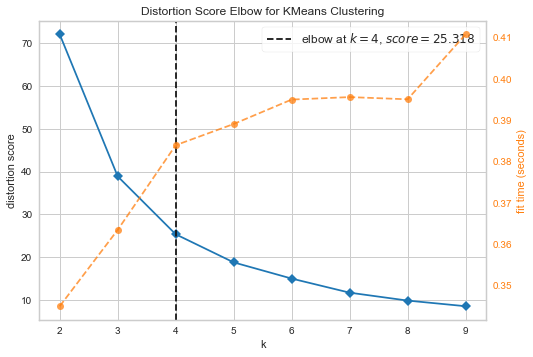

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [303]:
visualizer=KElbowVisualizer(km,k=(2,10))

visualizer.fit(rfm_rfm_scaled_df)
visualizer.show()

In [304]:
km=KMeans(n_clusters=4)
km.fit(rfm_rfm_scaled_df)

KMeans(n_clusters=4)

In [305]:
#Predicting the clusters

In [306]:
cluster_predict=km.predict(rfm_rfm_scaled_df)

In [307]:
rfm_df1=rfm_df.copy(deep=True)

In [308]:
rfm_df1['clusters']=cluster_predict
rfm_df1.head()

,CustomerID,Recency,Frequency,Monetary,r,f,m,rfm_segment,rfm_score,General_Segment,clusters
0,12346.0,325,1,77183.60,1,1,4,114,6,Bronze,1
1,12347.0,2,182,4310.00,4,4,4,444,12,Gold,2
2,12348.0,75,31,1797.24,2,2,4,224,8,Silver,0
3,12349.0,18,73,1757.55,3,3,4,334,10,Silver,2
4,12350.0,310,17,334.40,1,1,2,112,4,Bronze,1


In [309]:
def cluster_no(i):
    if i==0:
        i=1
    elif i==1:
        i=2
    elif i==2:
        i=3
    else:
        i=4
    return i

In [310]:
rfm_df1['clusters']=rfm_df1['clusters'].apply(cluster_no)

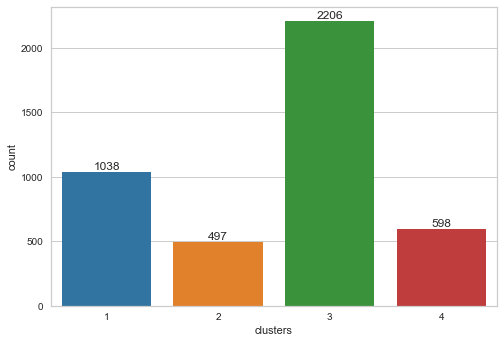

In [311]:
cp=sns.countplot(x='clusters',data=rfm_df1)
cp.bar_label(cp.containers[0])
plt.show()

In [312]:
rfm_df1.groupby('clusters')['General_Segment'].value_counts()

clusters  General_Segment
1         Silver              535
          Bronze              503
2         Bronze              465
          Silver               32
3         Silver             1080
          Gold                833
          Bronze              293
4         Bronze              491
          Silver              107
Name: General_Segment, dtype: int64

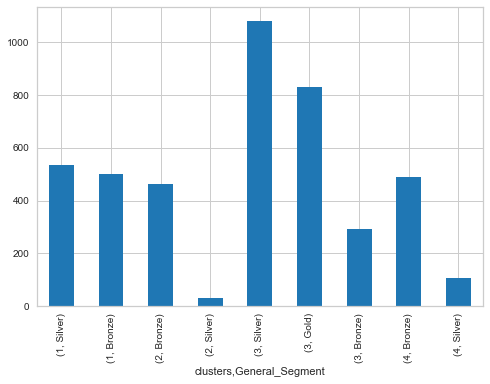

In [313]:
rfm_df1.groupby('clusters')['General_Segment'].value_counts().plot(kind='bar')
plt.show()

In [314]:
rfm_melt=pd.melt(rfm_df1,id_vars=['CustomerID','General_Segment','clusters'],value_vars=['Recency','Frequency','Monetary'],
                var_name='Metric',value_name='Value')
rfm_melt.head()

,CustomerID,General_Segment,clusters,Metric,Value
0,12346.0,Bronze,2,Recency,325.0
1,12347.0,Gold,3,Recency,2.0
2,12348.0,Silver,1,Recency,75.0
3,12349.0,Silver,3,Recency,18.0
4,12350.0,Bronze,2,Recency,310.0


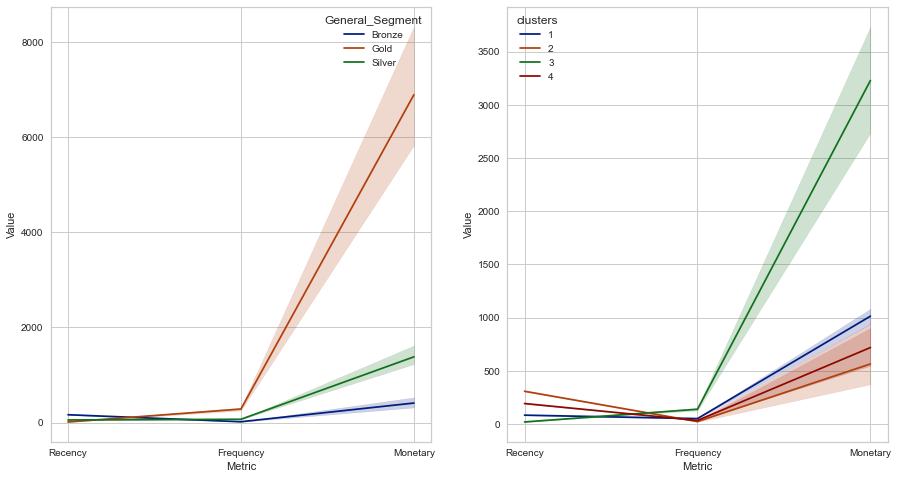

In [317]:
#palette=sns.color_palette('tab10')
f, (ax1, ax2) = plt.subplots(1,2, figsize=(15, 8))
sns.lineplot(x = 'Metric', y = 'Value', hue = 'General_Segment', palette='dark',data = rfm_melt,ax=ax1)
sns.lineplot(x = 'Metric', y = 'Value', hue = 'clusters', palette='dark',data = rfm_melt,ax=ax2)

plt.show()

### Apriori Algorithm

In [319]:
Gold_seg.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Invoice_Date,Invoice_Time,Total,Recency,Frequency,Monetary,r,f,m,rfm_segment,rfm_score,General_Segment
297,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,1.69,13047.0,United Kingdom,2010-12-01,08:34:00,54.08,31,172,3237.54,3,4,4,344,11,Gold
298,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2.10,13047.0,United Kingdom,2010-12-01,08:34:00,12.60,31,172,3237.54,3,4,4,344,11,Gold
299,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2.10,13047.0,United Kingdom,2010-12-01,08:34:00,12.60,31,172,3237.54,3,4,4,344,11,Gold
300,536367,22749,FELTCRAFT PRINCESS CHARLOTTE DOLL,8,3.75,13047.0,United Kingdom,2010-12-01,08:34:00,30.00,31,172,3237.54,3,4,4,344,11,Gold
301,536367,22310,IVORY KNITTED MUG COSY,6,1.65,13047.0,United Kingdom,2010-12-01,08:34:00,9.90,31,172,3237.54,3,4,4,344,11,Gold


In [320]:
gold_basket=Gold_seg.groupby(['InvoiceNo','Description'])['Quantity'].sum()
gold_basket

InvoiceNo  Description                        
536367     ASSORTED COLOUR BIRD ORNAMENT          32
           BOX OF 6 ASSORTED COLOUR TEASPOONS      6
           BOX OF VINTAGE ALPHABET BLOCKS          2
           BOX OF VINTAGE JIGSAW BLOCKS            3
           DOORMAT NEW ENGLAND                     4
                                                  ..
581585     ZINC WILLIE WINKIE  CANDLE STICK       24
581586     DOORMAT RED RETROSPOT                  10
           LARGE CAKE STAND  HANGING STRAWBERY     8
           RED RETROSPOT ROUND CAKE TINS          24
           SET OF 3 HANGING OWLS OLLIE BEAK       24
Name: Quantity, Length: 234577, dtype: int64

In [321]:
#Let's unstack the data to get it in a proper format

In [322]:
gold_basket=gold_basket.unstack().reset_index().fillna(0).set_index('InvoiceNo')
gold_basket.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536368,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536370,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
536376,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In product basket mix, we are trying to check whether the customer purchased the item or not. It is not important what numbers did he purchase. So, we will convert the dataset into binary features 0 and 1. 0 refering that the customer did not purchase and 1 refers that the customer purchased it.

In [323]:
def encoder(x):
    if x<=0:
        return 0
    if x>0:
        return 1
    
gold_basket1=gold_basket.applymap(encoder)
gold_basket1.head()

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
536376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since we are trying to find association between products, we need to filter out those transactions where the customer bought atleast 2 items.

In [324]:
gold_basket2=gold_basket1[(gold_basket1>0).sum(axis=1)>=2]
gold_basket2.head()                          

Description,4 PURPLE FLOCK DINNER CANDLES,50'S CHRISTMAS GIFT BAG LARGE,DOLLY GIRL BEAKER,I LOVE LONDON MINI BACKPACK,I LOVE LONDON MINI RUCKSACK,NINE DRAWER OFFICE TIDY,OVAL WALL MIRROR DIAMANTE,RED SPOT GIFT BAG LARGE,SET 2 TEA TOWELS I LOVE LONDON,SPACEBOY BABY GIFT SET,...,ZINC PLANT POT HOLDER,ZINC SWEETHEART SOAP DISH,ZINC SWEETHEART WIRE LETTER RACK,ZINC T-LIGHT HOLDER STAR LARGE,ZINC T-LIGHT HOLDER STARS LARGE,ZINC T-LIGHT HOLDER STARS SMALL,ZINC TOP 2 DOOR WOODEN SHELF,ZINC WILLIE WINKIE CANDLE STICK,ZINC WIRE KITCHEN ORGANISER,ZINC WIRE SWEETHEART LETTER TRAY
InvoiceNo,,,,,,,,,,,,,,,,,,,,,
536367,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536368,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
536376,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [325]:
gold_basket2.shape

(9247, 3706)

In [326]:
from mlxtend.frequent_patterns import apriori

In [327]:
frequent_items=apriori(gold_basket2,min_support=0.03,use_colnames=True).sort_values('support',ascending=False).reset_index(drop=True)
frequent_items['length']=frequent_items['itemsets'].apply(lambda x:len(x))
frequent_items

,support,itemsets,length
0,0.118200,(WHITE HANGING HEART T-LIGHT HOLDER),1
1,0.117768,(JUMBO BAG RED RETROSPOT),1
2,0.101222,(LUNCH BAG RED RETROSPOT),1
3,0.099384,(REGENCY CAKESTAND 3 TIER),1
4,0.084244,(PARTY BUNTING),1
...,...,...,...
164,0.030280,(SET OF 12 FAIRY CAKE BAKING CASES),1
165,0.030172,(PINK BLUE FELT CRAFT TRINKET BOX),1
166,0.030172,"(JUMBO BAG STRAWBERRY, JUMBO BAG RED RETROSPOT)",2
167,0.030172,(RED KITCHEN SCALES),1


Here, I defined frequently purchased items as those items which are purchased as many as 3% out of total transactions.So,the minimum support is 0.03. We can see that White Hanging Heart T-Light Holder has been purchased maximum times, i.e,9247*0.118200=1093 times out of all transactions. The length column shows the total number of items purchased.

In [328]:
#Finding the association between the products

In [329]:
from mlxtend.frequent_patterns import association_rules

In [330]:
association_rules(frequent_items,metric='lift',min_threshold=1).sort_values('lift',ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ROSES REGENCY TEACUP AND SAUCER ),(GREEN REGENCY TEACUP AND SAUCER),0.049962,0.043257,0.034606,0.692641,16.012121,0.032445,3.112783
1,(GREEN REGENCY TEACUP AND SAUCER),(ROSES REGENCY TEACUP AND SAUCER ),0.043257,0.049962,0.034606,0.800000,16.012121,0.032445,4.750189
2,(GARDENERS KNEELING PAD KEEP CALM ),(GARDENERS KNEELING PAD CUP OF TEA ),0.051584,0.045636,0.034390,0.666667,14.608215,0.032035,2.863091
3,(GARDENERS KNEELING PAD CUP OF TEA ),(GARDENERS KNEELING PAD KEEP CALM ),0.045636,0.051584,0.034390,0.753555,14.608215,0.032035,3.848379
4,(DOLLY GIRL LUNCH BOX),(SPACEBOY LUNCH BOX ),0.047259,0.056018,0.032984,0.697941,12.459181,0.030336,3.125152
5,(SPACEBOY LUNCH BOX ),(DOLLY GIRL LUNCH BOX),0.056018,0.047259,0.032984,0.588803,12.459181,0.030336,2.316996
6,(PAPER CHAIN KIT 50'S CHRISTMAS ),(PAPER CHAIN KIT VINTAGE CHRISTMAS),0.061533,0.045312,0.030929,0.502636,11.092785,0.028141,1.919496
7,(PAPER CHAIN KIT VINTAGE CHRISTMAS),(PAPER CHAIN KIT 50'S CHRISTMAS ),0.045312,0.061533,0.030929,0.682578,11.092785,0.028141,2.956522
8,(ALARM CLOCK BAKELIKE GREEN),(ALARM CLOCK BAKELIKE RED ),0.063372,0.068130,0.043798,0.691126,10.144198,0.039480,3.016993
9,(ALARM CLOCK BAKELIKE RED ),(ALARM CLOCK BAKELIKE GREEN),0.068130,0.063372,0.043798,0.642857,10.144198,0.039480,2.622559


We can see that Roses Regency Teacup and Saucer and Green Regency Teacup and Saucer are the items with highest lift value. This means they are likely to be sold together.If the lift value is greater than 1, it is enough for us to show that the two items are associated with each other.

This information can help us bundling the products and product placements. Roses Regency Teacup and Saucer and Green Regency Teacup and Saucer should be placed together or nearby each other.

It also helps us decide on which product we can offer discount.In this case, we can offer discount on Green Regency Teacup and Saucer, if someone buys Roses Regency Teacup and Saucer.